In [1]:


import pandas as pd
import numpy as np
import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds



%matplotlib inline  


In [2]:
b1 = tsds.load_airline_passengers()
df = b1.mPastData

In [3]:

lEngine = autof.cForecastEngine()
lEngine.mOptions.mDebugCycles = False
lEngine.mOptions.mModelSelection_Criterion = 'MAPE'

lEngine


In [4]:
lEngine.train(df , 'time' , 'AirPassengers' , 12)

INFO:pyaf.std:START_TRAINING 'AirPassengers'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['AirPassengers']' 1.6606183052062988


In [5]:
lEngine.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='time' TimeMin=1949.0 TimeMax=1956.91666666667 TimeDelta=0.08333333333336763 Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='AirPassengers' Length=132  Min=104 Max=559  Mean=262.49242424242425 StdDev=106.22114554451818
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_AirPassengers' Min=104 Max=559  Mean=262.49242424242425 StdDev=106.22114554451818
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_AirPassengers_LinearTrend_residue_zeroCycle_residue_AR(33)' [LinearTrend + NoCycle + AR]
INFO:pyaf.std:TREND_DETAIL '_AirPassengers_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_AirPassengers_LinearTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_AirPassengers_LinearTrend_residue_zeroCycle_residue_AR(33)' [AR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.0349 MAPE_Forecast=0.0217 MAPE_Test=0.0541
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.0346 SMAPE_Forecast=0.022 SMAPE_Test=0.0558


INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 1.3527143001556396


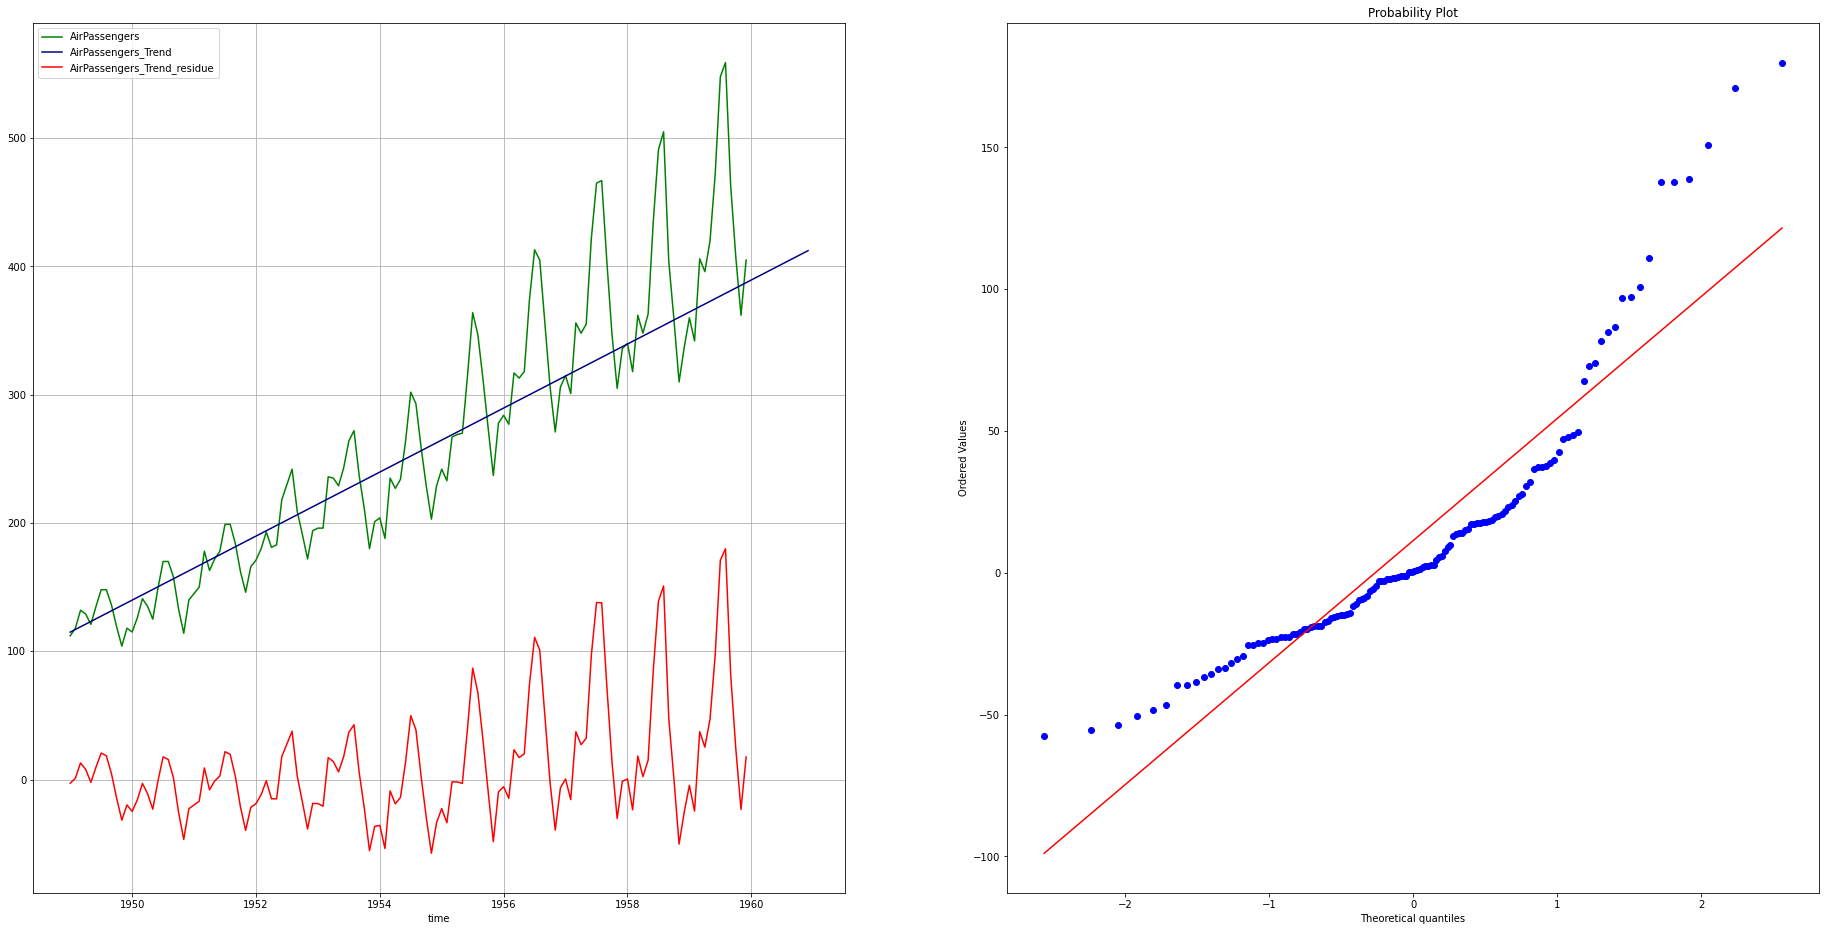

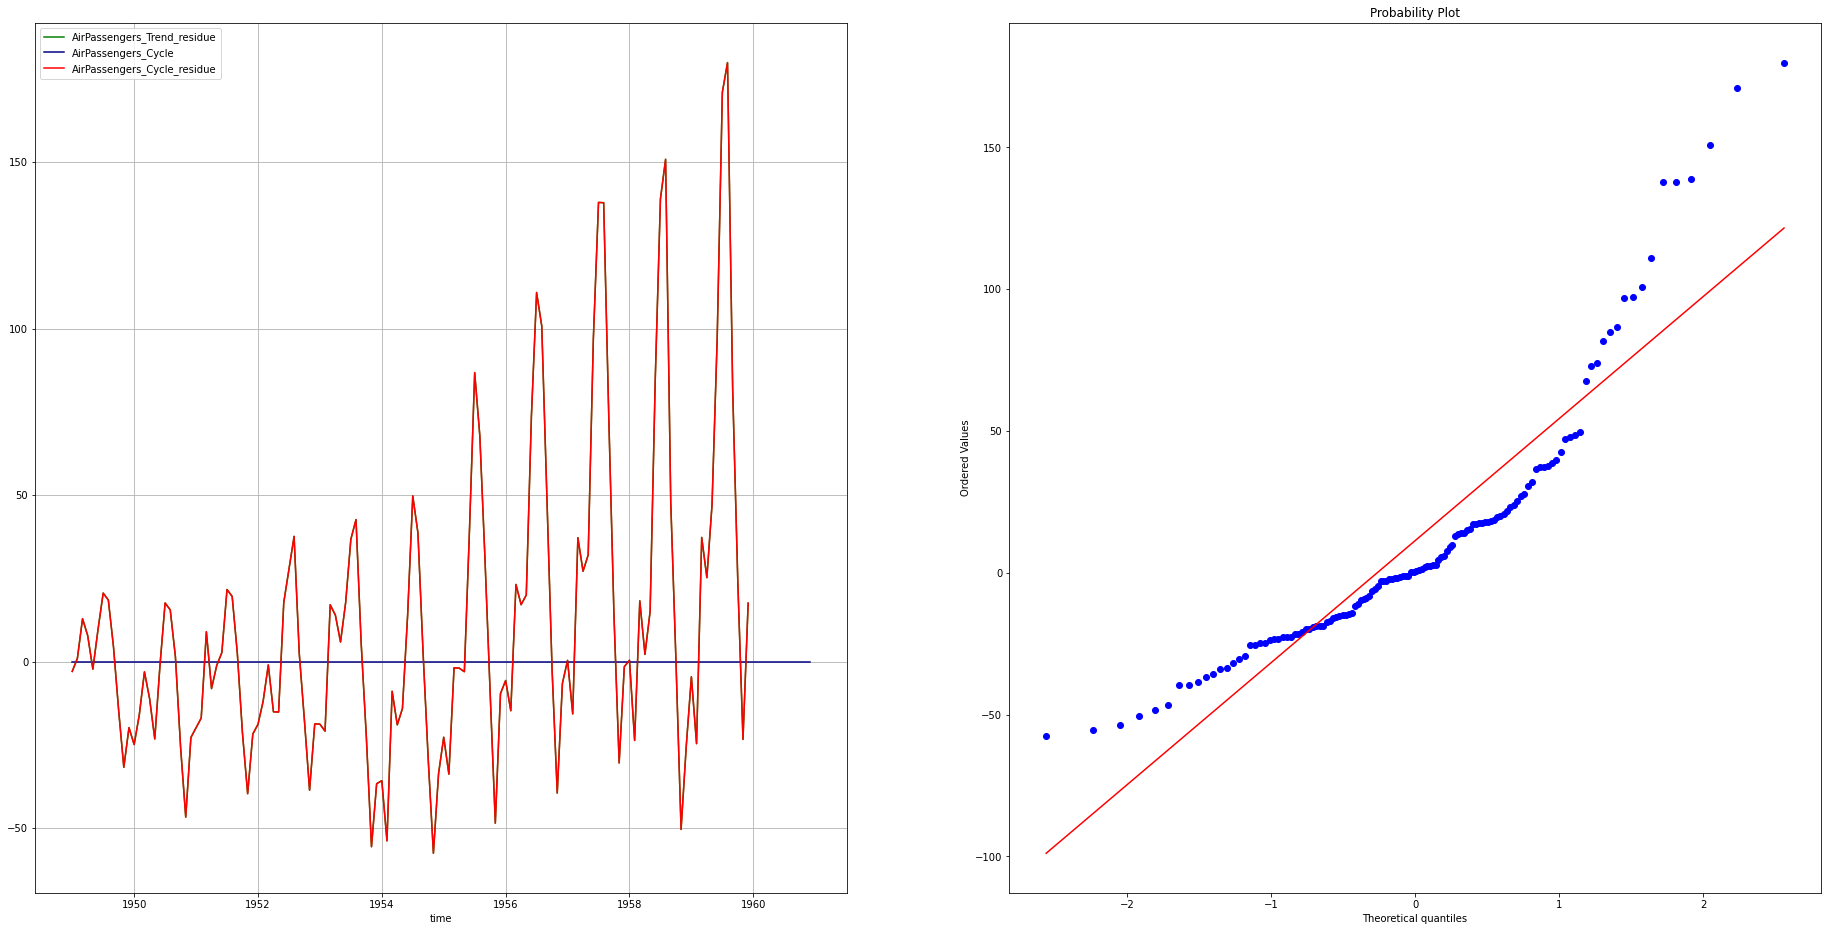

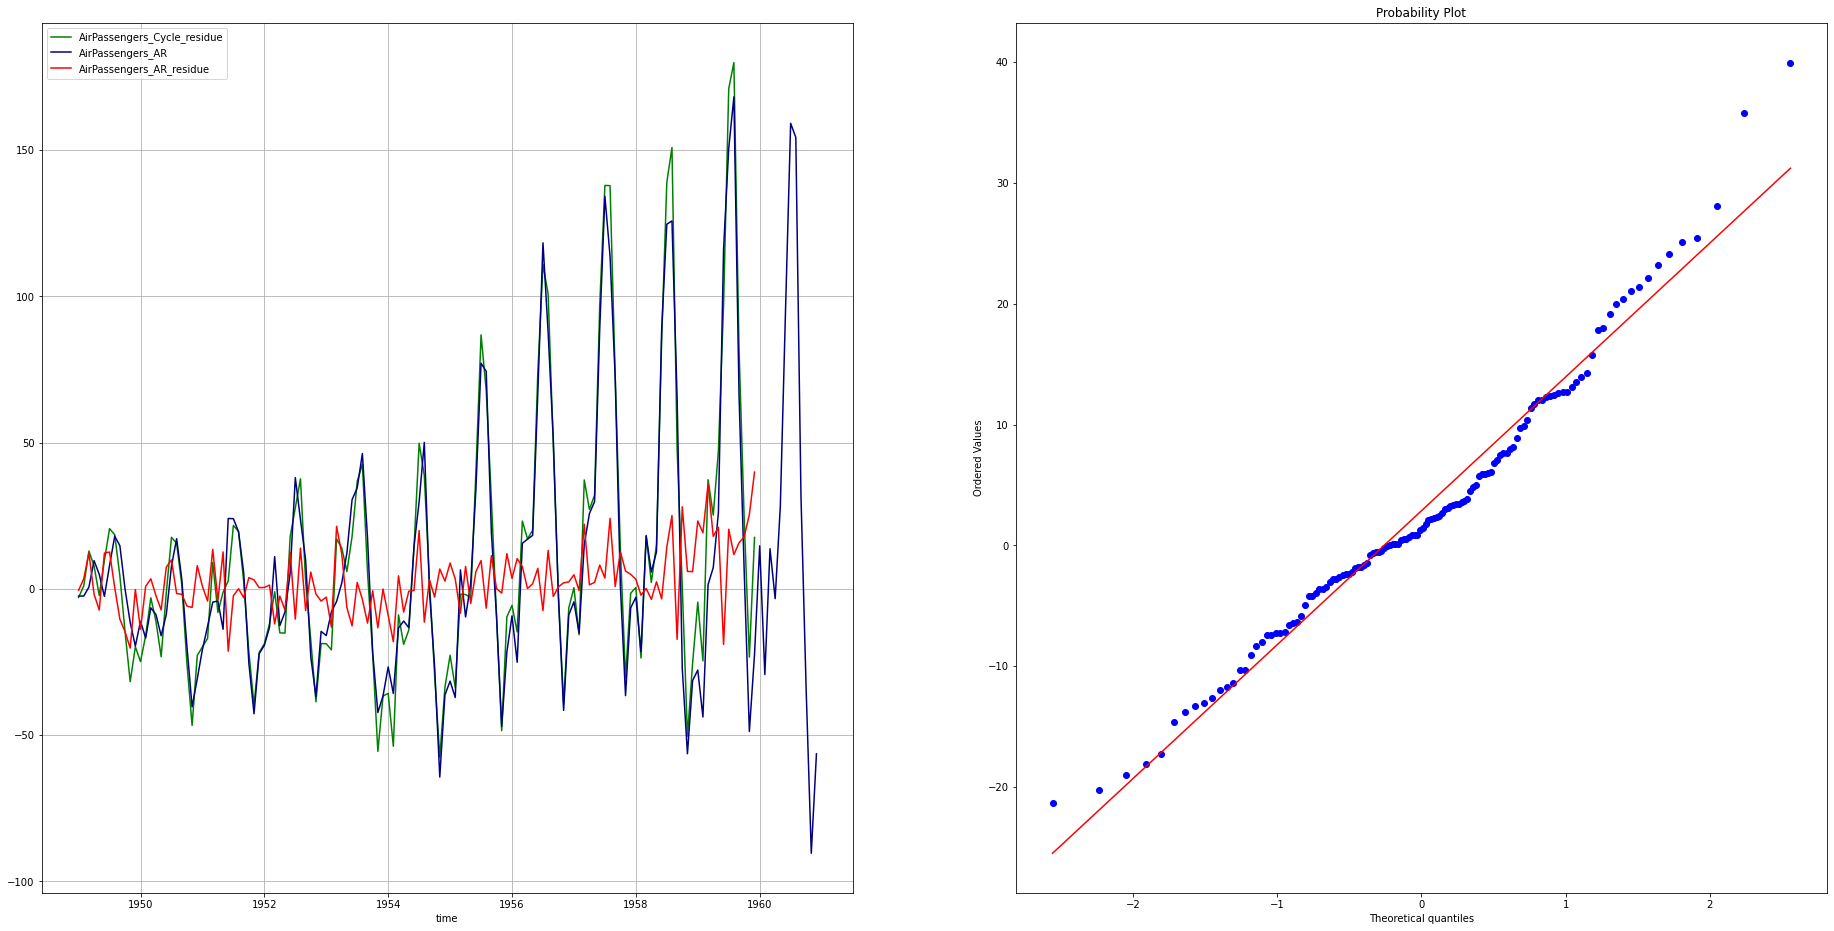

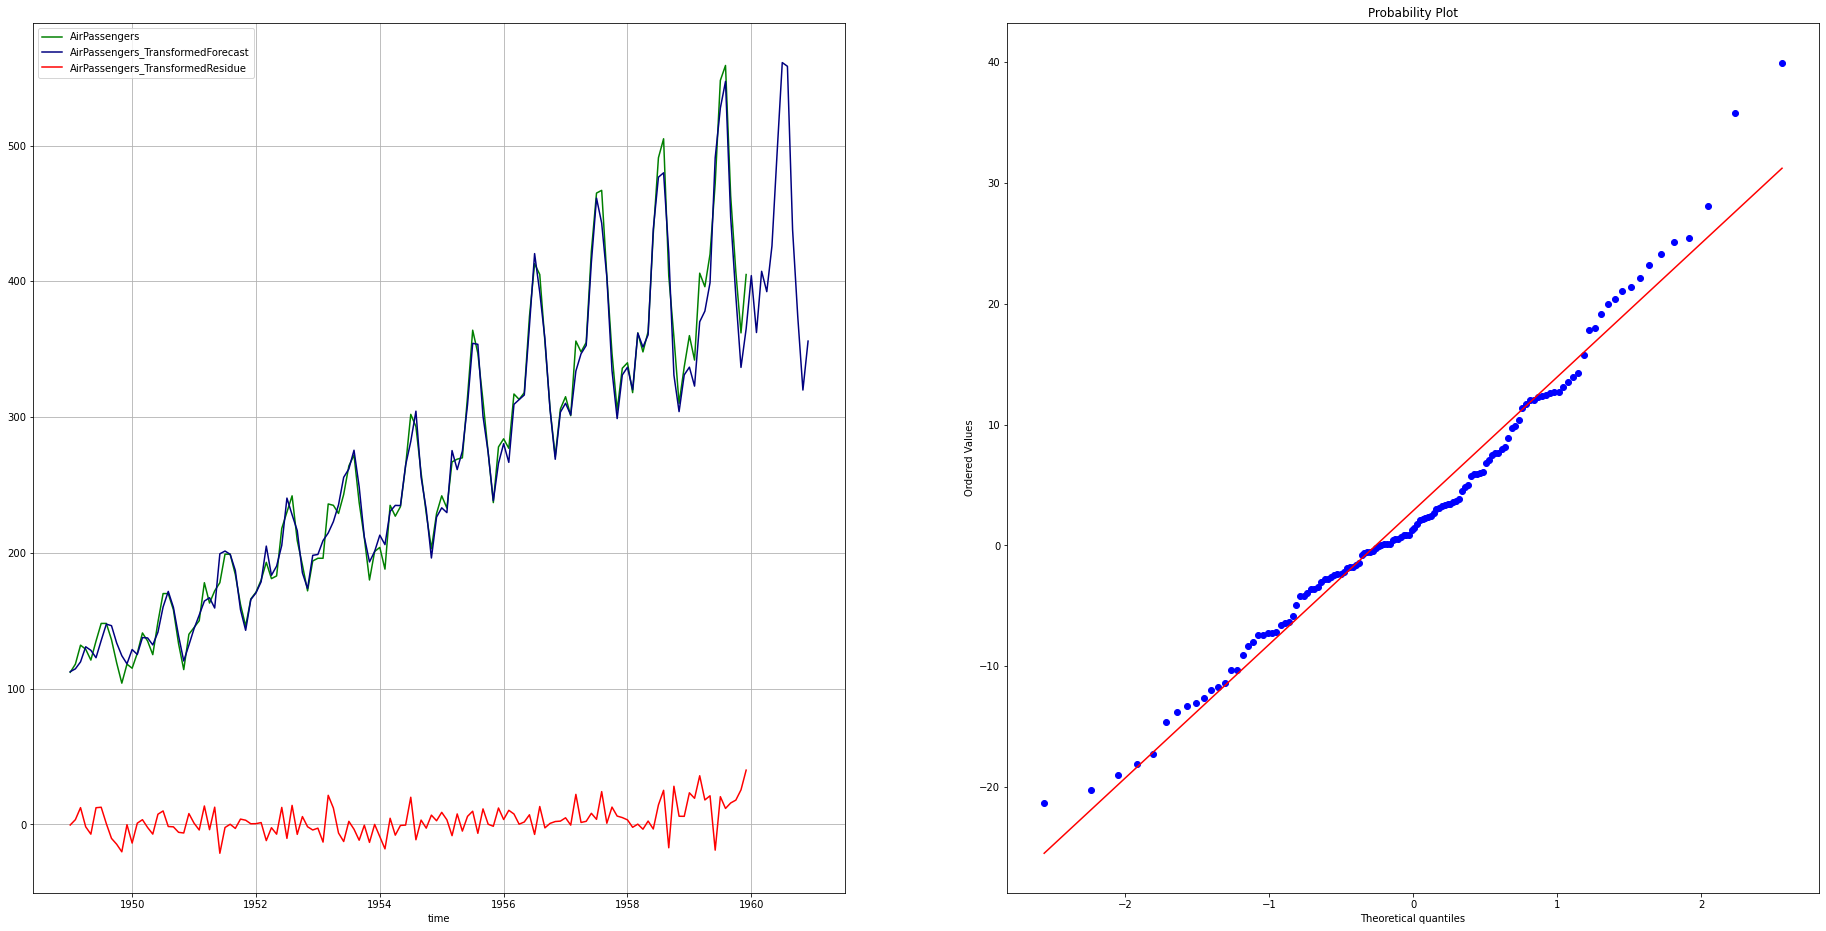

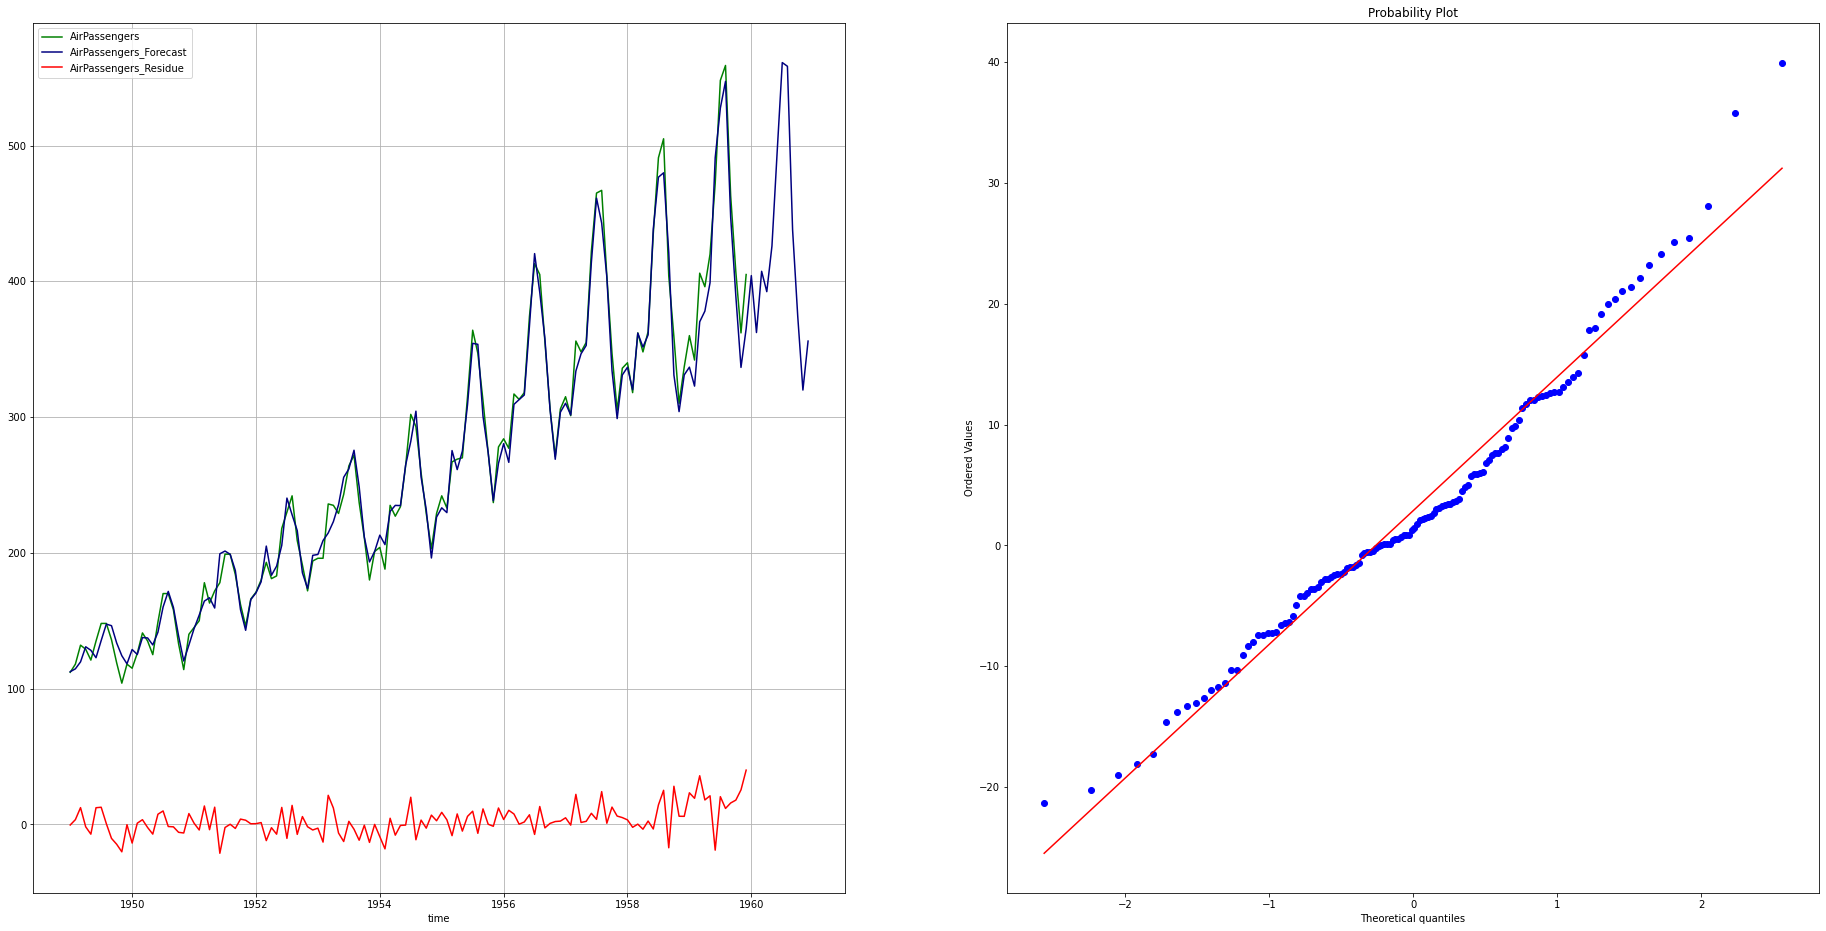

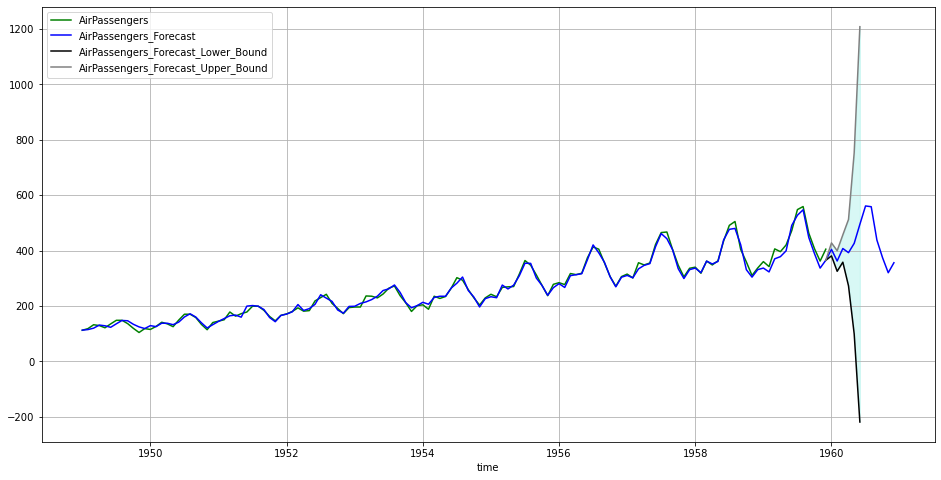

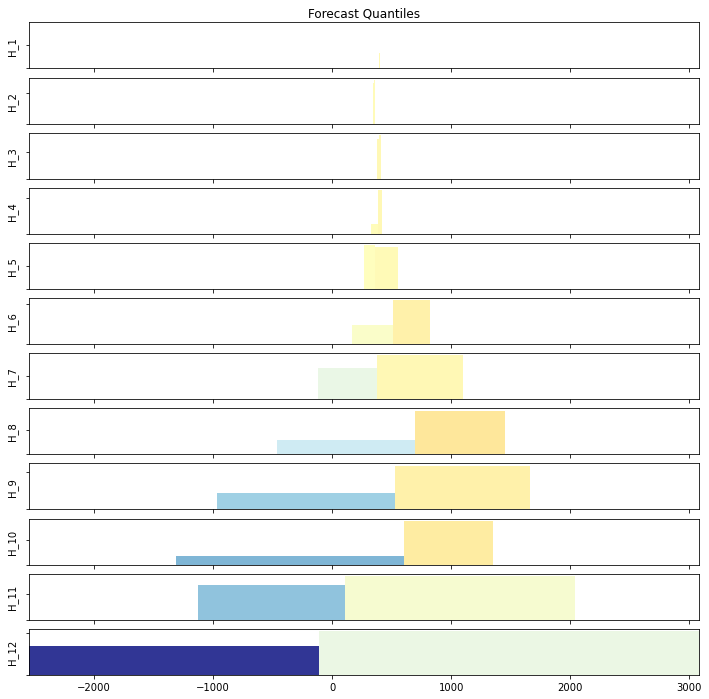

In [6]:
lEngine.standardPlots()

In [7]:
lEngine.mSignalDecomposition.mTrPerfDetails

,Split,Transformation,Model,Category,Complexity,FitMAPE,ForecastMAPE,TestMAPE
0,None,Diff_AirPassengers,Diff_AirPassengers_Lag1Trend_residue_zeroCycle...,Difference_Lag1Trend_NoCycle_AR,88,4.400000e-02,2.050000e-02,4.020000e-02
1,None,_AirPassengers,_AirPassengers_LinearTrend_residue_zeroCycle_r...,NoTransf_LinearTrend_NoCycle_AR,40,3.490000e-02,2.170000e-02,5.410000e-02
2,None,_AirPassengers,_AirPassengers_LinearTrend_residue_bestCycle_b...,NoTransf_LinearTrend_Cycle_None_AR,48,3.490000e-02,2.170000e-02,5.410000e-02
3,None,Diff_AirPassengers,Diff_AirPassengers_Lag1Trend_residue_bestCycle...,Difference_Lag1Trend_Cycle_AR,96,8.490000e-02,2.320000e-02,2.960000e-02
4,None,_AirPassengers,_AirPassengers_Lag1Trend_residue_zeroCycle_res...,NoTransf_Lag1Trend_NoCycle_AR,56,3.500000e-02,2.670000e-02,2.810000e-02
...,...,...,...,...,...,...,...,...
59,None,RelDiff_AirPassengers,RelDiff_AirPassengers_PolyTrend_residue_bestCy...,RelativeDifference_PolyTrend_Cycle_None_AR,80,4.106258e+06,2.183870e+06,1.910118e+06
60,None,RelDiff_AirPassengers,RelDiff_AirPassengers_PolyTrend_residue_zeroCy...,RelativeDifference_PolyTrend_NoCycle_NoAR,48,4.106184e+06,2.183870e+06,1.910119e+06
61,None,RelDiff_AirPassengers,RelDiff_AirPassengers_PolyTrend_residue_bestCy...,RelativeDifference_PolyTrend_Cycle_None_NoAR,56,4.106184e+06,2.183870e+06,1.910119e+06
62,None,RelDiff_AirPassengers,RelDiff_AirPassengers_ConstantTrend_residue_ze...,RelativeDifference_ConstantTrend_NoCycle_AR,56,4.106139e+06,2.183871e+06,1.910119e+06


In [8]:
dfapp = df.copy();
dfapp.tail()

,time,AirPassengers
ID,,
128,1959.583333,559
129,1959.666667,463
130,1959.750000,407
131,1959.833333,362
132,1959.916667,405


In [9]:
dfapp1 = lEngine.forecast(dfapp, 12);

INFO:pyaf.std:START_FORECASTING '['AirPassengers']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['AirPassengers']' 0.36806559562683105


In [10]:
dfapp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 26 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   time                                                                 144 non-null    float64
 1   AirPassengers                                                        132 non-null    float64
 2   row_number                                                           144 non-null    int64  
 3   time_Normalized                                                      144 non-null    float64
 4   _AirPassengers                                                       132 non-null    float64
 5   _AirPassengers_LinearTrend                                           144 non-null    float64
 6   _AirPassengers_LinearTrend_residue                                   132 non-null    float64
 7   _AirPass

In [11]:
dfapp1.tail(15)

,time,AirPassengers,row_number,time_Normalized,_AirPassengers,_AirPassengers_LinearTrend,_AirPassengers_LinearTrend_residue,_AirPassengers_LinearTrend_residue_zeroCycle,_AirPassengers_LinearTrend_residue_zeroCycle_residue,_AirPassengers_LinearTrend_residue_zeroCycle_residue_AR(33),...,_AirPassengers_AR_residue,_AirPassengers_TransformedForecast,AirPassengers_Forecast,_AirPassengers_TransformedResidue,AirPassengers_Residue,AirPassengers_Forecast_Lower_Bound,AirPassengers_Forecast_Upper_Bound,AirPassengers_Forecast_Quantile_25,AirPassengers_Forecast_Quantile_50,AirPassengers_Forecast_Quantile_75
129,1959.750000,407.0,129,1.357895,407.0,383.233652,23.766348,0.0,23.766348,5.916188,...,17.850160,389.149840,389.149840,17.850160,17.850160,NaN,NaN,NaN,NaN,NaN
130,1959.833333,362.0,130,1.368421,362.0,385.313717,-23.313717,0.0,-23.313717,-48.726271,...,25.412554,336.587446,336.587446,25.412554,25.412554,NaN,NaN,NaN,NaN,NaN
131,1959.916667,405.0,131,1.378947,405.0,387.393783,17.606217,0.0,17.606217,-22.339271,...,39.945488,365.054512,365.054512,39.945488,39.945488,NaN,NaN,NaN,NaN,NaN
132,1960.000000,NaN,132,1.389474,NaN,389.473848,NaN,0.0,NaN,14.718918,...,NaN,404.192766,404.192766,NaN,NaN,380.728111,427.657421,394.909234,399.922553,403.531407
133,1960.083333,NaN,133,1.400000,NaN,391.553913,NaN,0.0,NaN,-29.281556,...,NaN,362.272358,362.272358,NaN,NaN,325.120709,399.424006,345.837645,350.829255,360.167806
134,1960.166667,NaN,134,1.410526,NaN,393.633978,NaN,0.0,NaN,13.732021,...,NaN,407.365999,407.365999,NaN,NaN,357.966345,456.765653,380.269374,391.389936,411.370409
135,1960.250000,NaN,135,1.421053,NaN,395.714044,NaN,0.0,NaN,-3.336674,...,NaN,392.377370,392.377370,NaN,NaN,272.407032,512.347708,329.923272,389.046619,416.564680
136,1960.333333,NaN,136,1.431579,NaN,397.794109,NaN,0.0,NaN,28.214095,...,NaN,426.008204,426.008204,NaN,NaN,98.777610,753.238798,271.803823,360.949940,549.230031
137,1960.416667,NaN,137,1.442105,NaN,399.874174,NaN,0.0,NaN,94.758406,...,NaN,494.632580,494.632580,NaN,NaN,-219.494876,1208.760036,164.185682,514.446054,819.961143
138,1960.500000,NaN,138,1.452632,NaN,401.954239,NaN,0.0,NaN,159.169935,...,NaN,561.124175,561.124175,NaN,NaN,-928.258671,2050.507020,-118.126394,378.573520,1097.217920


In [12]:
dfapp1.describe()

,time,AirPassengers,row_number,time_Normalized,_AirPassengers,_AirPassengers_LinearTrend,_AirPassengers_LinearTrend_residue,_AirPassengers_LinearTrend_residue_zeroCycle,_AirPassengers_LinearTrend_residue_zeroCycle_residue,_AirPassengers_LinearTrend_residue_zeroCycle_residue_AR(33),...,_AirPassengers_AR_residue,_AirPassengers_TransformedForecast,AirPassengers_Forecast,_AirPassengers_TransformedResidue,AirPassengers_Residue,AirPassengers_Forecast_Lower_Bound,AirPassengers_Forecast_Upper_Bound,AirPassengers_Forecast_Quantile_25,AirPassengers_Forecast_Quantile_50,AirPassengers_Forecast_Quantile_75
count,144.000000,132.000000,144.000000,144.000000,132.000000,144.000000,132.000000,144.0,132.000000,144.000000,...,132.000000,144.000000,144.000000,132.000000,132.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1954.958333,262.492424,71.500000,0.752632,262.492424,263.629900,11.342916,0.0,11.342916,9.735265,...,2.869621,273.365165,273.365165,2.869621,2.869621,-1903.050513,2752.112786,-385.984819,384.911029,1135.998418
std,3.476109,106.625799,41.713307,0.439087,106.625799,86.766401,45.776879,0.0,45.776879,47.250344,...,11.070764,110.064355,110.064355,11.070764,11.070764,2639.028577,2595.950263,926.609486,214.537054,832.801818
min,1949.000000,104.000000,0.000000,0.000000,104.000000,114.905233,-57.509802,0.0,-57.509802,-90.367617,...,-21.294298,112.465107,112.465107,-21.294298,-21.294298,-7009.110973,399.424006,-2544.333649,-105.953410,360.167806
25%,1951.979167,176.500000,35.750000,0.376316,176.500000,189.267567,-18.758170,0.0,-18.758170,-19.587775,...,-3.446734,184.816038,184.816038,-3.446734,-3.446734,-4246.891272,498.452194,-1004.307642,358.419769,415.266112
50%,1954.958333,239.500000,71.500000,0.752632,239.500000,263.629900,0.587425,0.0,0.587425,-1.463662,...,1.357335,263.162831,263.162831,1.357335,1.357335,-573.876774,1629.633528,23.029644,390.218278,958.589531
75%,1957.937500,343.250000,107.250000,1.128947,343.250000,337.992233,23.348453,0.0,23.348453,20.575765,...,9.058865,352.977559,352.977559,9.058865,9.058865,285.585452,5063.824497,333.901865,518.313191,1502.119869
max,1960.916667,559.000000,143.000000,1.505263,559.000000,412.354566,179.926478,0.0,179.926478,168.195768,...,39.945488,561.124175,561.124175,39.945488,39.945488,380.728111,7721.072427,394.909234,699.993314,3078.278736
